## IMPORTING PACKAGES:

In [17]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

## LOADING THE DATASET:

In [18]:
df=pd.read_csv("/content/Iris Flower - Iris.csv")
df=df.drop(['Id'],axis=1)
# axis is 0 for rows, 1 for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## SLICING THE DATASET INTO FEATURES AND TARGET VARIABLES :

In [20]:
#slicing
x =df.iloc[:,:4] #features
y =df.iloc[:,-1] #target variable
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## TRAIN-TEST SPLIT:

In [21]:
#train-test split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7, random_state=0)
x_train.shape

(105, 4)

In [22]:
y_train.shape

(105,)

## MODEL FITTING:

In [23]:
classifier = SVC() # Train the model
classifier.fit(x_train, y_train)

SVC()

## MAKING PREDICTIONS:

In [24]:
# Make predictions on the test set
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

## GENERATING CONFUSION MATRIX:

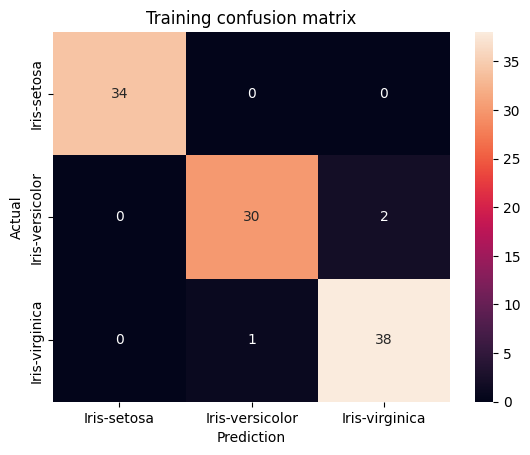

In [25]:
train_cm=confusion_matrix(y_train,y_pred_train)
sns.heatmap(train_cm,annot=True,xticklabels=classifier.classes_,yticklabels=classifier.classes_)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Training confusion matrix')
plt.show()

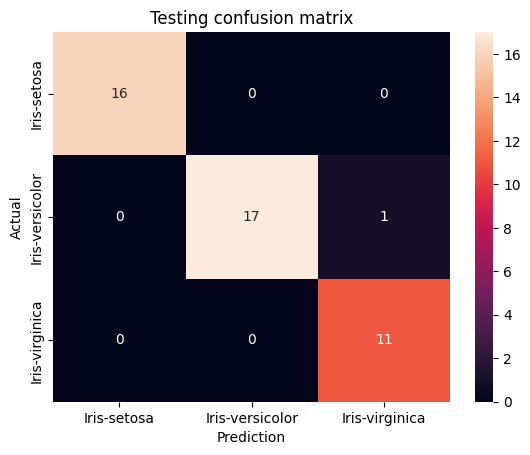

In [26]:
test_cm=confusion_matrix(y_test,y_pred_test)
sns.heatmap(test_cm,annot=True,xticklabels=classifier.classes_,yticklabels=classifier.classes_)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Testing confusion matrix')
plt.show()

## CLASSIFICATION REPORT:

In [27]:
print("Training classification report:\n",classification_report(y_train,y_pred_train))

Training classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        34
Iris-versicolor       0.97      0.94      0.95        32
 Iris-virginica       0.95      0.97      0.96        39

       accuracy                           0.97       105
      macro avg       0.97      0.97      0.97       105
   weighted avg       0.97      0.97      0.97       105



In [28]:
print("Testing classification report:\n",classification_report(y_test,y_pred_test))

Testing classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



## VISUALISING THROUGH SCATTER PLOT:

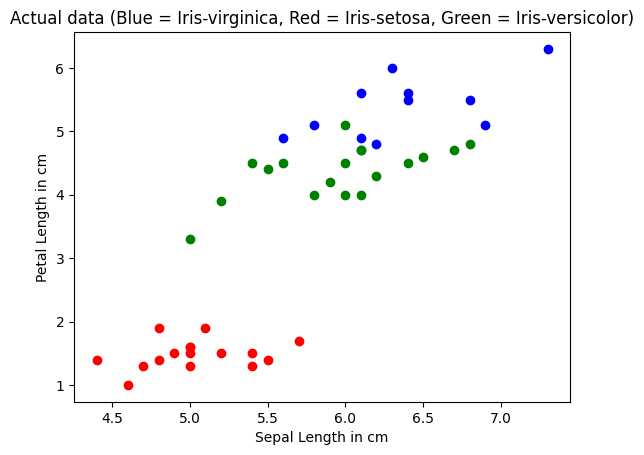

In [29]:
plt.scatter(x_test['SepalLengthCm'][y_test=='Iris-setosa'],x_test['PetalLengthCm'][y_test=='Iris-setosa'],color='red')
plt.scatter(x_test['SepalLengthCm'][y_test=='Iris-virginica'],x_test['PetalLengthCm'][y_test=='Iris-virginica'],color='blue')
plt.scatter(x_test['SepalLengthCm'][y_test=='Iris-versicolor'],x_test['PetalLengthCm'][y_test=='Iris-versicolor'],color='green')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.title('Actual data (Blue = Iris-virginica, Red = Iris-setosa, Green = Iris-versicolor)')
plt.show()

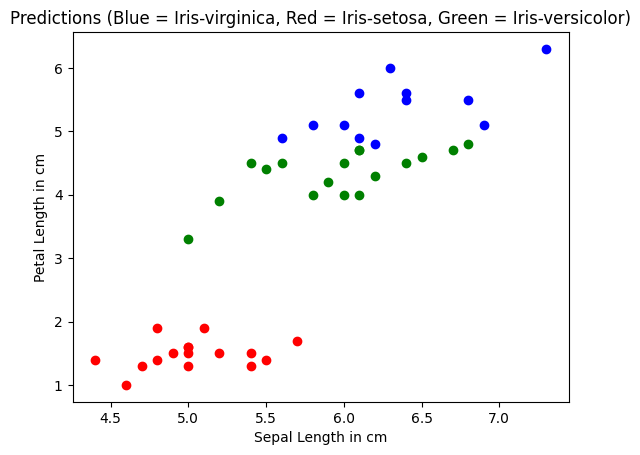

In [30]:
plt.scatter(x_test['SepalLengthCm'][y_pred_test=='Iris-setosa'],x_test['PetalLengthCm'][y_pred_test=='Iris-setosa'],color='red')
plt.scatter(x_test['SepalLengthCm'][y_pred_test=='Iris-virginica'],x_test['PetalLengthCm'][y_pred_test=='Iris-virginica'],color='blue')
plt.scatter(x_test['SepalLengthCm'][y_pred_test=='Iris-versicolor'],x_test['PetalLengthCm'][y_pred_test=='Iris-versicolor'],color='green')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.title('Predictions (Blue = Iris-virginica, Red = Iris-setosa, Green = Iris-versicolor)')
plt.show()